# Group Assignment  Jan 30
## Members: Yang LI, Yi LIANG, Yun LI, Xiaoyi HAO, Hemin HE, Yuwen CHE

## Exercise 1

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta

In [56]:
n = 100
X = np.empty(n)

class KDE:
    
    def __init__(self,X,h = (4/3) * np.std(X) * (n ** (-0.2))):
        self.X = X
        self.h = h
    
    def each(self,x):
        t = (x-self.X)/self.h
        return (norm.pdf(t).sum())/(n*self.h)
    
    def f(self,x):
        i = 0
        y = np.empty(len(x))
        for i in range(len(x)):
            y[i] = self.each(x[i]) 
        return y
 

In [59]:
def check(α,β):
    
    X = beta.rvs(α,β,size=n)
    kde = KDE(X)
    
    fig, ax = plt.subplots(figsize=(9, 6))
    grid = np.linspace(-3,3,20000)
    ax.plot(grid,kde.f(grid),color = 'b' , alpha=0.8, lw=1,label='$KDE$')
    ax.plot(grid,beta.pdf(grid,α,β),color = 'r', alpha=0.8, lw=1,label='$density$')
    ax.legend()
    plt.show()

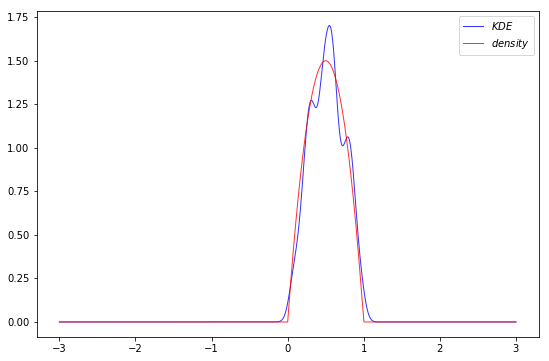

In [60]:
check(2,2)

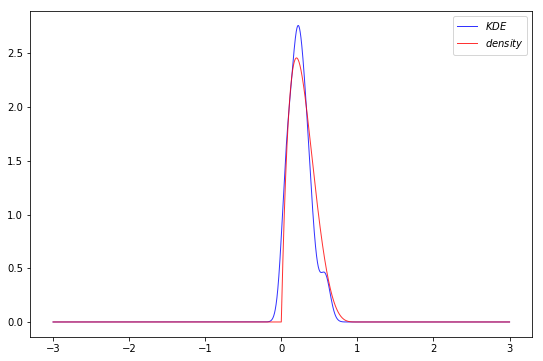

In [61]:
check(2,5)

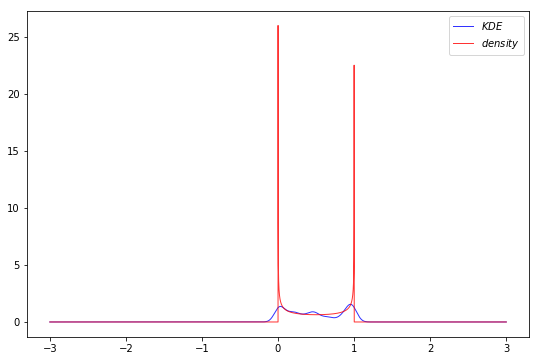

In [62]:
check(0.5,0.5)

### Comment: Generally speaking, it is a good estimator of these distributions. However, some extreme values cannot be captured by the KDE function.

## Exercise 2

In [101]:
import numba
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

### Part 1

In [64]:
ρ= 0.9
b = 0.0
σ= 0.1
μ= -3
s = 0.2
n = 100_000

In [65]:
x_t = np.random.normal(μ,s,n)      
bins = np.linspace( -3.7,-2.3,100)

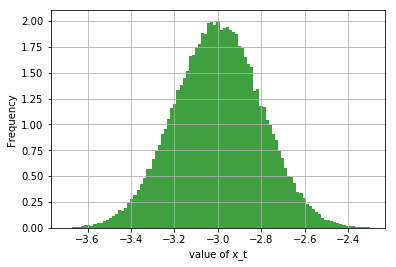

In [66]:
plt.hist(x_t,bins = bins,normed=True ,facecolor='green',alpha=0.75)
plt.grid(True)
plt.xlabel('value of x_t')
plt.ylabel('Frequency')
plt.show()

### Part 2

In [67]:
ξ_t1 = np.random.normal(0,1,n) 
x_t1 = ρ* x_t + b + σ* ξ_t1

In [68]:
mean_ξ_t1 = ρ*μ+b
sd_ξ_t1 = ((ρ**2)*(s**2)+σ**2)**0.5
print(mean_ξ_t1)
print(sd_ξ_t1)

-2.7
0.20591260281974003


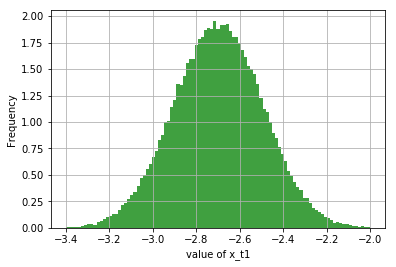

In [69]:
bins = np.linspace(-3.4,-2,100)
plt.hist(x_t1,bins = bins,normed=1,facecolor='green',alpha=0.75)
plt.grid(True)
plt.xlabel('value of x_t1')
plt.ylabel('Frequency')
plt.show()

### Part 3

In [99]:
def plot_kde(sample, ax, label=''):     # Method 1
    
    xmin, xmax = 1.2 * min(sample), 0.9 * max(sample)
    xgrid = np.linspace(-10, 5, 100)
    kde = KernelDensity(kernel='gaussian').fit(sample[:, None])
    log_dens = kde.score_samples(xgrid[:, None])

    ax.plot(xgrid, np.exp(log_dens), label=label)
    

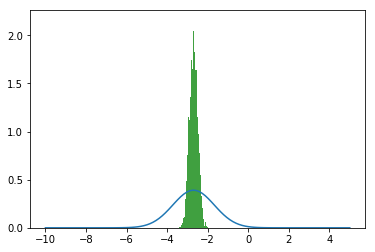

In [100]:
fig, ax = plt.subplots()
plot_kde(x_t1, ax)
bins = np.linspace(-3.4,-2,100)
ax.hist(x_t1,bins = bins,normed=1,facecolor='green',alpha=0.75)
plt.show()

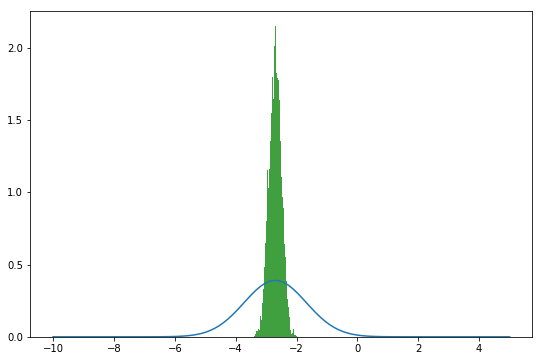

In [91]:
X = beta.rvs(0.5,2,size=100)     # Method 2

kde = KDE(X)
    
fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(bins,kde.f(bins),color = 'b' , alpha=0.8, lw=1,label='$KDE$')


plot_kde(x_t1, ax)
bins = np.linspace(-3.4,-2,100)
ax.hist(x_t1,bins = bins,normed=1,facecolor='green',alpha=0.75)
plt.show()

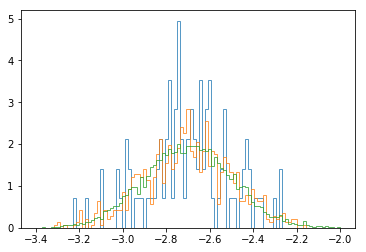

In [106]:
fig, ax = plt.subplots()
x_t = np.random.normal(μ,s,100)      
ξ_t1 = np.random.normal(0,1,100) 
x_t1 = ρ* x_t + b + σ* ξ_t1
bins = np.linspace(-3.4,-2,100)
ax.hist(x_t1,bins = bins,normed=1,histtype='step',facecolor='green',alpha=0.75)

x_t = np.random.normal(μ,s,1000)      
ξ_t1 = np.random.normal(0,1,1000) 
x_t1 = ρ* x_t + b + σ* ξ_t1
bins = np.linspace(-3.4,-2,100)
ax.hist(x_t1,bins = bins,normed=1,histtype='step',facecolor='green',alpha=0.75)

x_t = np.random.normal(μ,s,10000)      
ξ_t1 = np.random.normal(0,1,10000) 
x_t1 = ρ* x_t + b + σ* ξ_t1
bins = np.linspace(-3.4,-2,100)
ax.hist(x_t1,bins = bins,normed=1,histtype='step',facecolor='green',alpha=0.75)

plt.show()